# Inferencia Estadística y Reconocimiento de Patrones - TP 2

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation as MAD

data_wine = pd.read_csv('data/winequality-red.csv', sep=';')

In [43]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [44]:
# Muestra aleatoria
sample = data_wine.sample(n=70, random_state=42)

In [45]:
# Proporción de cada clase en el dataset original
data_wine['quality'].value_counts(normalize=True)

quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: proportion, dtype: float64

In [46]:
# Proporción de cada clase en la muestra
sample['quality'].value_counts(normalize=True)

quality
5    0.485714
6    0.342857
7    0.128571
3    0.014286
8    0.014286
4    0.014286
Name: proportion, dtype: float64

La cantidad de observaciones correspondientes a cada clase dentro de la muestra, en proporción, se asemeja bastante al dataset original. Además, existe al menos una observación por categoría (a costa de sobrerrepresentar algunas clases), lo que otorga a la muestra una mayor representatividad.

In [47]:
# Media y desvío de cada variable numérica del dataset original
data_wine.describe().loc[['mean', 'std'], :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569


In [48]:
# Media y desvío de cada variable numérica de la muestra
sample.describe().loc[['mean', 'std'], :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,8.185714,0.514786,0.263857,2.364286,0.084229,12.700000,42.057143,0.996638,3.317571,0.665571,10.260714,5.600000
std,1.749475,0.161863,0.184189,1.128265,0.044419,7.313577,29.387903,0.001832,0.145964,0.167017,0.967549,0.840979


Si observamos a detalle la estimación de parámetros como la media y el desvío, comparando entre datos originales y muestrales, notamos, una vez más, una semejanza suficientemente decente como para poder considerar a nuestra muestra efectivamente representativa.

In [49]:
# Método Bootstrap
B = 5000
n = len(sample)
bs_mad = np.empty(B)

np.random.seed(42)
for i in range(B):
    bs_sample =  sample.sample(n=n, replace=True)
    bs_mad[i] = MAD(bs_sample['pH'])

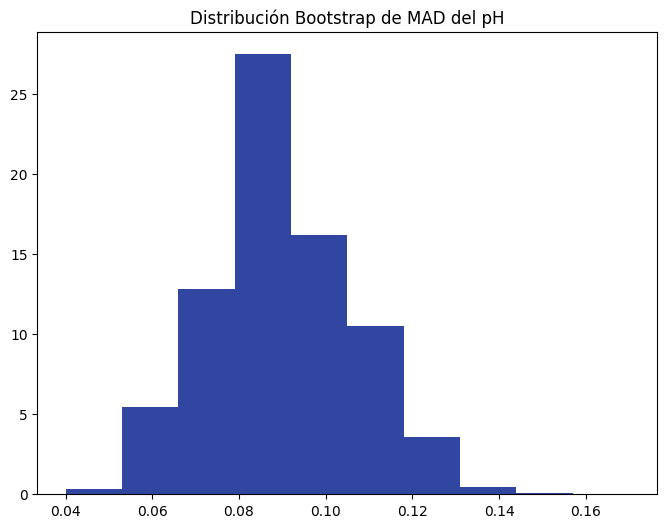

In [50]:
# Gráfico del histograma
plt.figure(figsize=(8,6))
plt.hist(bs_mad, color="#3146a0", density=True)
plt.title('Distribución Bootstrap de MAD del pH')
plt.show()

Analizando el gráfico, podemos afirmar que el histograma de las MAD calculadas para cada muestra bootstrap, que nos sirve como una aproximación o estimación de la función de densidad de probabilidad del estimador, tiene una forma suficientemente acampanada, por lo tanto, el intervalo de confianza de nivel 0,95 lo calculamos como:


In [51]:
# Standard Error
se = np.std(bs_mad, ddof=1)

# MAD de los datos de la muestra
mad = MAD(sample['pH'])

# Intervalo
bott = mad - 1.96 * se
top = mad + 1.96 * se 

print(f'Intervalo bootstrap para la MAD de nivel 0,95:\n [{bott:.4f} : {top:.4f}]')

Intervalo bootstrap para la MAD de nivel 0,95:
 [0.0527 : 0.1173]


Aún así, decidimos agregar también el intervalo percentílico de nivel 0,95:

In [52]:
inf, sup = np.percentile(bs_mad, [2.5, 97.5])

print(f'Intervalo bootstrap percentílico para la MAD de nivel 0,95:\n [{inf:.4f} : {sup:.4f}]')

Intervalo bootstrap percentílico para la MAD de nivel 0,95:
 [0.0600 : 0.1250]


Semilla 101
  Error estándar = 0.01661
  Sesgo = -0.01078

Semilla 22
  Error estándar = 0.01632
  Sesgo = -0.01085

Semilla 11
  Error estándar = 0.01652
  Sesgo = -0.01060

Semilla 36
  Error estándar = 0.01671
  Sesgo = -0.01053

Semilla 99
  Error estándar = 0.01678
  Sesgo = -0.01085

Semilla 15
  Error estándar = 0.01651
  Sesgo = -0.01064



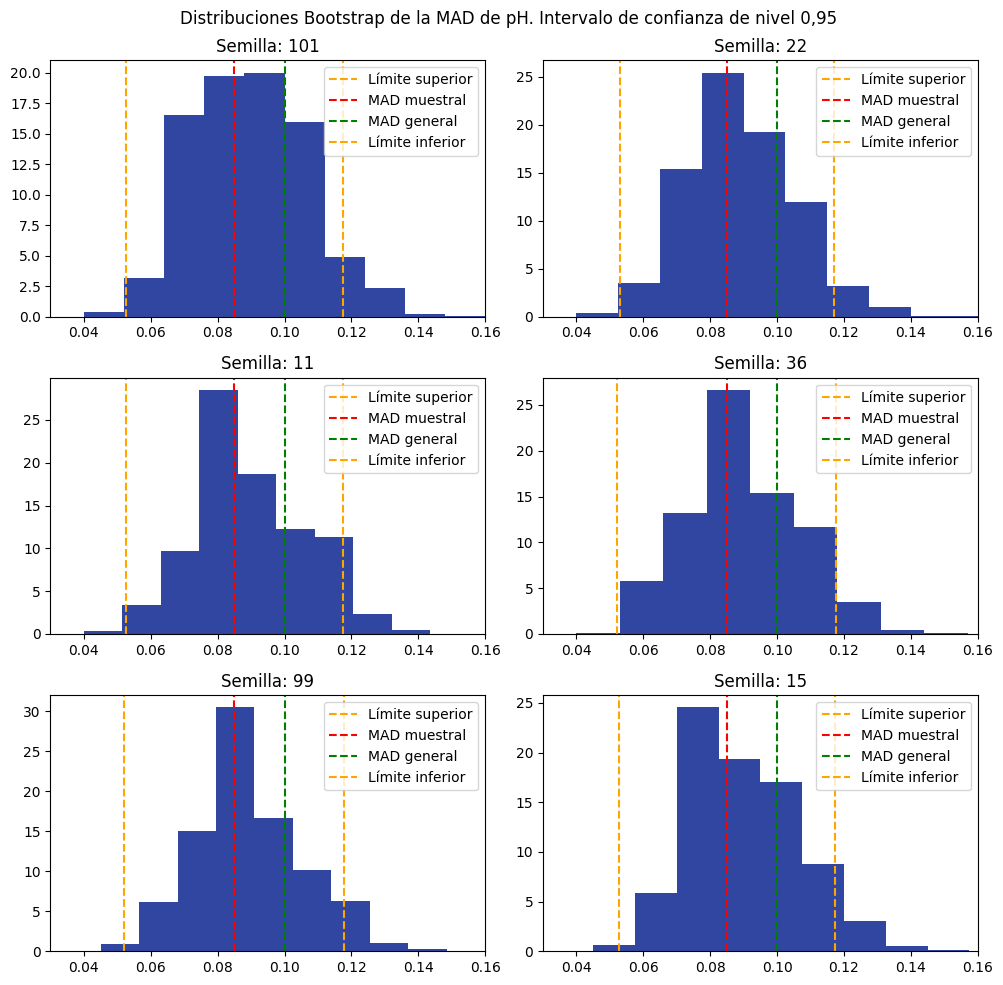

In [59]:
seeds = [101, 22, 11, 36, 99, 15]
B = 5000
n = len(sample)
mad = MAD(sample['pH'])
mad_p = MAD(data_wine['pH'])

fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()
fig.suptitle('Distribuciones Bootstrap de la MAD de pH. Intervalo de confianza de nivel 0,95')


for seed, ax in zip(seeds, axes):
    bs_mad = np.empty(B)
    np.random.seed(seed)
    for i in range(B):
        bs_sample =  sample.sample(n=n, replace=True)
        bs_mad[i] = MAD(bs_sample['pH'])
    bias = np.mean(bs_mad) - mad_p
    se = np.std(bs_mad)
    intervalo = [mad - 1.96 * se, mad + 1.96 * se]
    print(f'Semilla {seed}\n  Error estándar = {se:.5f}\n  Sesgo = {bias:.5f}\n')
    ax.hist(bs_mad, color="#3146a0", density=True)
    ax.axvline(intervalo[1],
               linestyle='--',
               color='orange',
               label='Límite superior')
    ax.axvline(mad,
               linestyle='--',
               color='red',
               label='MAD muestral')
    ax.axvline(mad_p,
               linestyle='--',
               color='green',
               label='MAD general')
    ax.axvline(intervalo[0],
               linestyle='--',
               color='orange',
               label='Límite inferior')
    ax.set_title(f'Semilla: {seed}')
    ax.set_xlim(0.03, 0.16)
    ax.legend()    
plt.tight_layout()
plt.show()
